<a href="https://colab.research.google.com/github/cu7th0n/capstone/blob/master/DogsVsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   <center>Machine Learning Engineer Nanodegree</center>
##   <center>Project: Dogs vs. Cats Redux: Kernels Edition</center>
### <center>曹迪</center>


### 准备数据

---



In [0]:
#创建文件夹
!mkdir sample_data/DogsVsCats

利用 kaggle API 将数据下载到 colab


首先从 kaggel.com 下载个人账户的 [API credentials](https://github.com/Kaggle/kaggle-api#api-credentials) 文件 kaggle.json 

然后上传 kaggle.json 文件到 colab

最后创建 .kaggle 文件夹，将 kaggle.json 文件复制到 .kaggle 文件夹

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

在 kaggle [Dogs vs. Cats Redux: Kernels Edition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data) data 页面复制 API 命令，在 colab 里执行该命令下载数据。

In [0]:
#下载项目数据
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

解压文件到指定文件夹

In [0]:
#解压文件
!unzip train.zip -d sample_data/DogsVsCats/
!unzip test.zip -d sample_data/DogsVsCats/

### 探索数据集


---



*   加载数据



In [0]:
import numpy as np
from glob import glob

train_files = np.array(glob("sample_data/DogsVsCats/train/*"))
test_files = np.array(glob("sample_data/DogsVsCats/test/*"))



*   查看数据量



In [27]:
len(train_files)

25000

In [28]:
len(test_files)

12500

In [34]:
train_files[0]

'sample_data/DogsVsCats/train/cat.10722.jpg'



*   随机查看 25 张训练数据图片质量



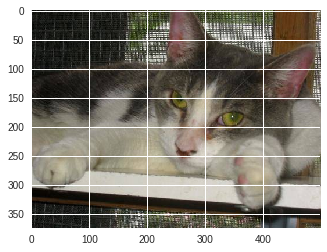

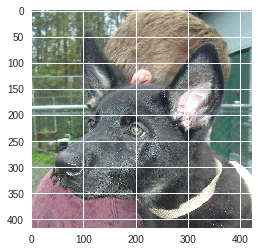

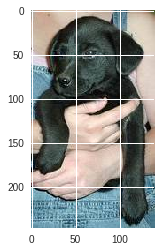

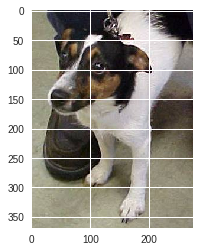

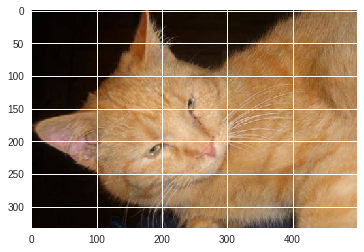

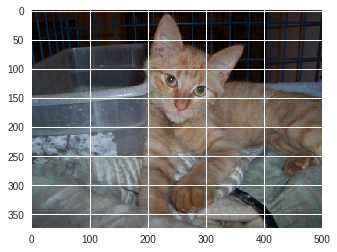

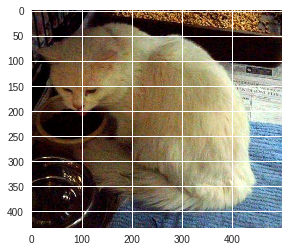

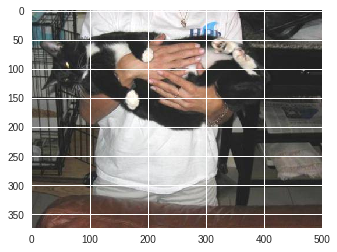

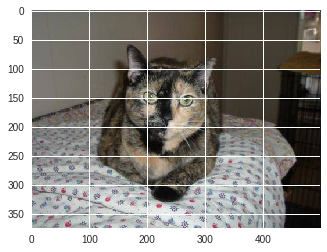

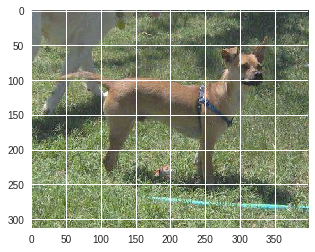

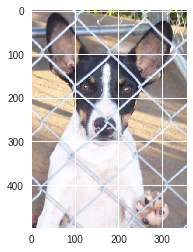

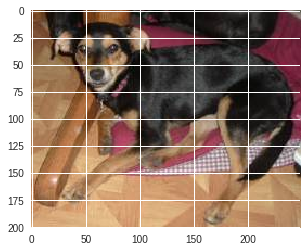

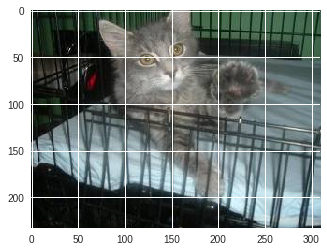

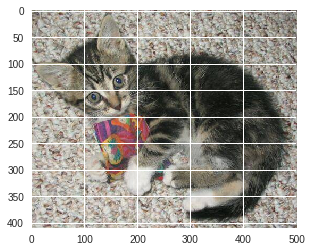

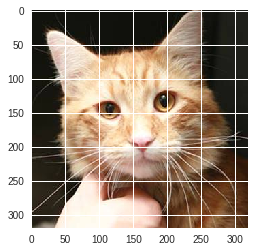

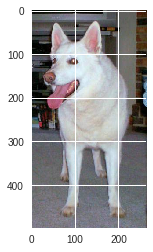

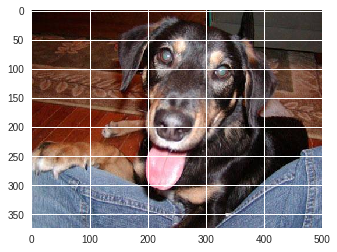

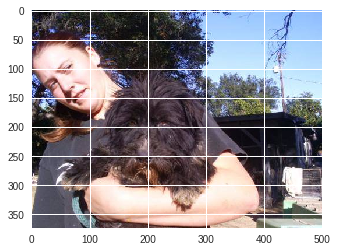

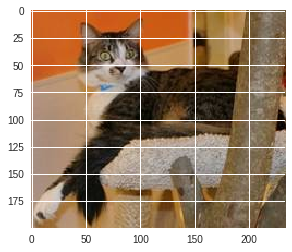

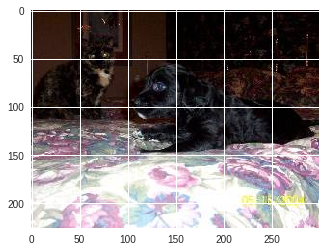

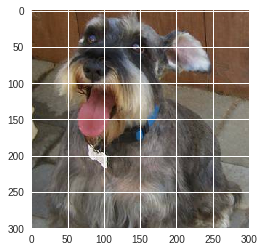

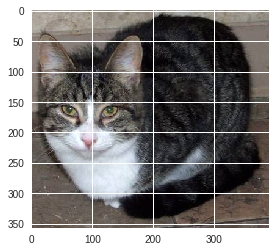

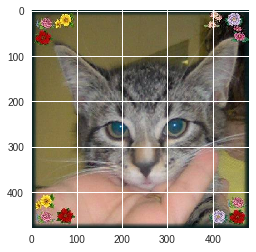

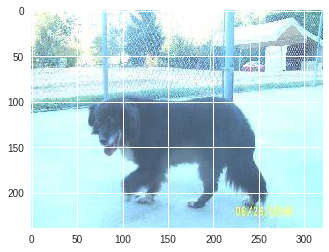

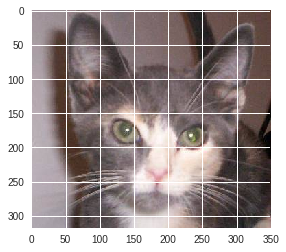

In [54]:
import random
import cv2  
import matplotlib.pyplot as plt                        
%matplotlib inline

sampled = [random.randint(0,25000) for _ in range(25)]
for i in sampled:
  sampled_image = cv2.imread(train_files[i])
  plt.imshow(cv2.cvtColor(sampled_image, cv2.COLOR_BGR2RGB))
  plt.show()

* 可以看出训练图片尺寸并不统一，背景复杂多样，大部分采样图片内容单纯是猫狗图像，有些图片中猫狗图像受背景影响并不突出，还有图片里既有猫又有狗等情况。

* 以上说明训练数据需要剔除质量不好的图片。

* 由于有 25000 张图片，手工剔除比较麻烦且费时，这里选择采用预训练的 ResNet-50 模型直接检验图片中的狗和猫。

In [35]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet' )

img_path = train_files[0]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', np.argmax(preds))

Predicted: 285


In [38]:
len(preds[0])

1000